# mp-QP example

## Problem statement

Solve:

$$
\begin{aligned}
\min \quad & 0.0098{x_1}^2 + 0.0063x_1x_2 + 0.00995{x_2}^2 \\
\textrm{s.t.} \quad & x_1 \le 0.417425 + 3.16515\theta_1 + 3.7546\theta_2 \\
& -x_1 \le 3.592575 - 3.16515\theta_1 - 3.7546\theta_2 \\
& -0.0609x_1 \le 0.413225 + 0.17355\theta_1 - 0.2717\theta_2\\
&  -0.0064x_1 \le 0.467075 + 0.06585\theta_1 + 0.4714\theta_2\\
&  x_2 \le 1.0902 + 1.8196\theta_1 - 3.2841\theta_2\\
& -x_2 \le 2.9098 - 1.8196\theta_1 + 3.2841\theta_2
&  \\
& 0 \le \theta_1 \le 1 \\
& 0 \le \theta_2 \le 1 \\
\end{aligned}
$$

With $x_1$, $x_2$ being optimised variables, and $\theta_1$, $\theta_2$ varying input parameters of the optimisation problem.

We would like to find out how the optimal solution $x_1^\ast$, $x_2^\ast$ change when $\theta_1$, $\theta_2$ vary, </br>
i.e. express $x_1^\ast$, $x_2^\ast$ as functions of $\theta_1$, $\theta_2$

## Inputs

Convert to a format suitable for the solver:

$$
\begin{aligned}
\min \quad & X^TQX + mX \\
\textrm{s.t.} \quad & AX +W\theta \le b \\
\end{aligned}
$$

$$
Q = \begin{bmatrix}
    0.0098 \times 2 & 0.0063 \\
    0.0063 & 0.00995 \times 2
\end{bmatrix}
$$

$$
m = \begin{bmatrix}
    0 & 0    
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
    1 & 0 \\
    -1 & 0 \\
     -0.0609 & 0\\
     -0.0064 & 0 \\
     0 & 1 \\
     0 & -1 \\
     0 & 0 \\
     0 & 0 \\
     0 & 0 \\
     0 & 0
\end{bmatrix}
W = \begin{bmatrix}
    -1 & 0 \\
    0 & -1 \\
    0 & 0 \\
    0 & 0 \\
    0 & 0 \\
    -1 & 0 \\
    1 & 0 \\
    0 & -1 \\
    0 & 1 \\    
\end{bmatrix}
b = 
\begin{bmatrix}
    -24000 \\
    2000 \\
    6000 \\
    0 \\
    0 \\
    0 \\
    6000 \\
    0 \\
    500 \\    
\end{bmatrix}
$$


In [15]:
import numpy as np

m = np.array(
    [0., 0.]
)

Q = np.array(
    [[0.0098*2, 0.0063],
     [0.0063, 0.00995*2]]
)

A = np.array(
    [[1.0, 0.],
     [-1.0 ,0.],
     [-0.0609, 0.],
     [-0.0064, 0.],
     [0., 1.0],
     [0., -1.0],
     [0., 0.],
     [0., 0.],
     [0., 0.],
     [0., 0.]]     
)

W = np.array(
    [[-3.16515, -3.7546],
     [3.16515, 3.7546],
     [-0.17355, 0.2717],
     [-0.06585, -0.4714],
     [-1.81960, 3.2841],
     [1.81960, -3.2841],
     [-1.0, 0.],
     [1.0, 0.],
     [0., -1.0],
     [0., 1.0]]     
)

b = np.array(
    [0.417425, 
     3.582575, 
     0.413225, 
     0.467075, 
     1.090200, 
     2.909800, 
     0., 
     1.0, 
     0., 
     1.0]
)



## Solve

In [16]:
from parametric_model.solvers.region_generator import ParametricSolver

mp = ParametricSolver(A, W, b, m, Q)
mp.solve()
print('Number of regions = ' + str(len(mp.regions)))


Number of regions = 5


## Show regions

In [17]:
np.set_printoptions(suppress=True)


def print_boundaries(region_index):
    """Print the boundaries and parameterised solution of specified region.
    
    The equations are printed in concatenated form.        
    """
    region = mp.regions[region_index]
    
    # process boundary outputs
    bound_lhs = np.concatenate(
        (region['firm_bound_A'], region['added_bound_A']),
        axis=0)
    bound_rhs = np.concatenate(
        (region['firm_bound_b'], region['added_bound_b']))
    bound_concat = np.concatenate(
        (bound_lhs, bound_rhs.reshape(-1, 1)),
        axis=1)
    
    # process solution outputs
    x_size = mp.x_size
    soln_concat = np.concatenate(
        (region['soln_A'], region['soln_b'].reshape(-1, 1)),
        axis=1)
    soln_concat = soln_concat[:x_size]
    
    # print outputs
    print(
        'Printing results in concatenated form for region ' 
        + str(region_index) + '...')
    print('Boundary equations:')
    print(np.round(bound_concat, 2))
    print('Optimal solution:')
    print(np.round(soln_concat, 2))
    print()
    

Displaying critical region map...


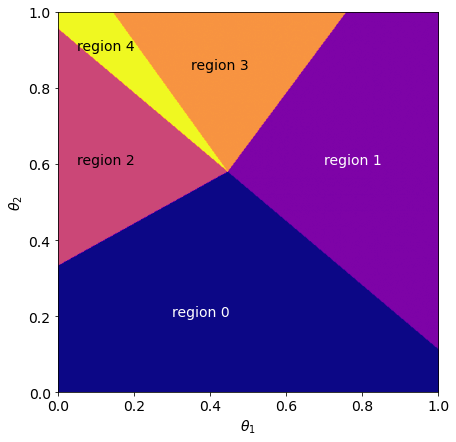

Printing results in concatenated form for region 0...
Boundary equations:
[[-1.    0.    0.  ]
 [ 1.    0.    1.  ]
 [ 0.   -1.    0.  ]
 [ 3.17  3.75  3.58]
 [-1.82  3.28  1.09]]
Optimal solution:
[[-0. -0.  0.]
 [-0. -0.  0.]]

Printing results in concatenated form for region 1...
Boundary equations:
[[ 1.    0.    1.  ]
 [ 0.    1.    1.  ]
 [-3.17 -3.75 -3.58]
 [-2.82  2.1  -0.04]]
Optimal solution:
[[ 3.17  3.75 -3.58]
 [-1.   -1.19  1.13]]

Printing results in concatenated form for region 2...
Boundary equations:
[[-1.    0.    0.  ]
 [ 3.17  3.75  3.58]
 [ 1.82 -3.28 -1.09]]
Optimal solution:
[[-0.58  1.06 -0.35]
 [ 1.82 -3.28  1.09]]

Printing results in concatenated form for region 3...
Boundary equations:
[[ 0.    1.    1.  ]
 [-3.17 -3.75 -3.58]
 [ 2.82 -2.1   0.04]
 [-0.07 -0.05 -0.06]]
Optimal solution:
[[ 3.17  3.75 -3.58]
 [ 1.82 -3.28  1.09]]

Printing results in concatenated form for region 4...
Boundary equations:
[[-1.    0.    0.  ]
 [ 0.    1.    1.  ]
 [-3.17 -3.7

In [18]:
import matplotlib.pyplot as plt


# create plot object
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 14})

# use imshow to show critical regions. 
# imshow takes a mesh of points in coordinates and display an image depending 
# on the value of each point. We can take each point to be a different combo of 
# parameter values. To check if a point is in region x, run the point values 
# through the inequality boundary equations of x, and check whether all 
# inequalities are met. If so, assign the point a colour that represents that region.
mesh_setting = 500
mesh_x = np.linspace(0., 1., mesh_setting)
mesh_y = np.linspace(0., 1., mesh_setting)
x, y = np.meshgrid(mesh_x, mesh_y)
im_data = np.zeros((mesh_setting, mesh_setting))

for r in range(len(mp.regions)):
    region = mp.regions[r]
    # firm bounds and added bounds refer to boundaries specified in original
    # optimisation problem, and those generated from solving the mp. 
    # We do not need to differentiate here so put them together with concat.
    all_bounds_A = np.concatenate(
        (region['firm_bound_A'], region['added_bound_A']),
        axis=0)
    all_bounds_b = np.concatenate(
        (region['firm_bound_b'], region['added_bound_b']))
    
    true_false_matrix = np.full((mesh_setting, mesh_setting), True)
    for i in range(len(all_bounds_b)):
        in_boundary = \
            all_bounds_A[i, 0] * x + all_bounds_A[i, 1] * y <= all_bounds_b[i]
        true_false_matrix = np.logical_and(true_false_matrix, in_boundary)
    # assign a colour number - anything works as long as can differentiate regions
    im_data[true_false_matrix] = r/10        

im = plt.imshow(
    im_data,
    extent=(x.min(),x.max(),y.min(),y.max()),
    origin='lower',
    cmap="plasma", 
    alpha = 1
)
plt.annotate('region 0', xy=(0.3, 0.2), color='white')
plt.annotate('region 1', xy=(0.7, 0.6), color='white')
plt.annotate('region 2', xy=(0.05, 0.6))
plt.annotate('region 3', xy=(0.35, 0.85))
plt.annotate('region 4', xy=(0.05, 0.9))

# # other plot settings
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
   
# display results
print('Displaying critical region map...')
plt.show()
for r in range(len(mp.regions)):
    print_boundaries(r)    

## Some observations

- Observe for each region, the number of sides is indeed equal to the number of boundary equations.
- The exception is region 3, it is a triangle but there are four boundary equations. This is likely due to limitations on the precision of the solver - the extra equation probably corresponds to a very tiny boundary near the centre.
- The optimal solutions of region 2 and 4 are exactly the same. We can combine them into one region. However, we might choose not to, as it does not prevent the user from getting the correct optimal solution.

## Final verification

Finally, verify the correctness of the MP solution by comparing the results from the MP against solving LP directly.

In [19]:
from parametric_model.processing.inputs import get_zeros_rows_index
from parametric_model.solvers.generic_solver import GenericSolver


test_size = 100
np.random.seed(0)

    
def compare_mp_lp(theta):
    """Compare MP result with LP given parameter theta.
    """
    
    # get optimal solution from mp
    mp_soln = mp.get_soln(theta)
    
    # now solve LP
    # with LP, we substitute actual values into θ and solve a simple LP.
    # This means constraint rows with only θ terms are redundant. We can 
    # remove these rows from A, b and W.
    zeros_rows = get_zeros_rows_index(A)
    A_opt = np.delete(A, zeros_rows, axis=0)
    b_opt = np.delete(b, zeros_rows) 
    W_opt = np.delete(W, zeros_rows, axis=0)
    
    # AX + Wθ <= b
    # As θ is now a value, lump with b to form a new constant term.
    # AX <= (b - Wθ)
    b_minus_theta = b_opt - np.dot(W_opt, theta.reshape(mp.theta_size, -1)).reshape(-1)   
    
    # class 'GenericSolver' solves a direct LP/QP
    opt = GenericSolver(A_opt, b_minus_theta, m, Q=Q)
    opt.solve()
    
    results_match = np.allclose(mp_soln, opt.soln, rtol=0.0, atol=1e-6)
    if results_match:
        return True
    else:
        return False


def test_mp(test_size):
    """Test mp against LP using randomly generated test values of theta.
    """
    
    print('Running tests on MP with a test size of ' + str(test_size) + '...')
    
    # create test values of θ
    random_inputs = np.random.uniform(
        low=0.0, 
        high=1.0, 
        size=(test_size, mp.x_size))
    
    # test and save result
    test_results = np.full((test_size), False)
    for t in range(test_size):
        theta = random_inputs[t, :]
        test_results[t] = compare_mp_lp(theta)

    all_tests_passed = np.all(test_results)
    if all_tests_passed:
        print('Tests passed. mp result matches LP for all tests.')
    else:
        print('Tests failed. MP result does not match LP for some tests.')
        

test_mp(test_size)

Running tests on MP with a test size of 100...
Tests passed. mp result matches LP for all tests.
